# Constant time complexity

In the previous notebook, we learned how to analyze the time complexity of an algorithm. We saw examples of linear time algorithms. The execution time of a linear time algorithm is proportional to the size of the data, O(N). We also saw an example of a quadratic time algorithm, which was an algorithm whose execution time is proportional to the square of the size of the dataset, $O(N^2)$.

In this lesson, we will see another kind of time complexity: **constant time complexity**. We will also learn the core operations that a computer can perform and how a computer structures data into its memory.

More concretely, an algorithm with **constant time complexity** is an algorithm whose execution time does not depend on the data that it is processing. A constant time algorithm can be very slow; what characterizes it, is the fact that the time it takes is independent of the amount of data:

<center>
<img src="https://drive.google.com/uc?id=1lfexDrSEB_zkpLJQVOPFL5g95q4mIKxW" width="30%">
</center>

The way of modeling the time complexity in the previous lesson assumed that each line execution takes a constant amount of time. In other words, each line of code is somewhat a constant time algorithm.

In this lesson, we are going to learn that this assumption does not necessarily hold all of the time. We will see which operations a computer can perform in constant time and which ones it cannot.

Before we start digging into that, let's do an exercise to recap what we've learned in the previous lesson.

**Instructions**


A function that computes the average value of a list is provided for you. Your task is to analyze its time complexity.

- Count how many times each line is executed in the worst case.
- Add the values together and group the terms together to obtain an expression for time(N) where N is the length of the input list.
- Assign to a list named **coefficients** the constant coefficients of the terms of time(N) from highest to the lowest. The coefficient of a non-existing term is 0. Example:
  - If $time(N) = 2N^3 + 3N + 1$ then **coefficients = [2, 0, 3, 1]**
- Assign to a variable named **order** a string containing the order of the function. Example:
  - If $time(N) = 4N^2 + 5N + 7$ then **order = "O(N^2)"**

In [ ]:
def average(values):
    average = 0 # 1
    for value in values: # n
        average += value # n
    return average / len(values) # 1


time(N) = 2 + 2n => [2, 2]

# coefficients = [2, 2]
# order = O(n)

# Constant Time Complexity in Python

On the previous section, we learned that a constant-time algorithm is an algorithm whose time complexity does not depend on the data. In terms of Python, these are functions whose execution time does not depend on the input. The **max_two()** function that computes the maximum between two given values is one such example:

In [ ]:
def max_two(a, b):
    if a >= b:
        return a
    return b

We can see that the number of line executions is not dependent on the values of `a` and `b`. In other words, the total number of line executions is constant. But don't take our word for it — let's do a line execution count to confirm it.

In [ ]:
def max_two(a, b):
    if a >= b:   # 1
        return a # 1
    return b     # 1

We get a total of three line executions when we add these values. We denote the complexity of such an algorithm by O(1) and say that it's a **constant time algorithm**.

We just saw an example with three line executions. However, even if the number of instructions is very large, as long as it's constant, the algorithm is still O(1). Let's see an example in Python. The function **sum_1000()** computes the sum of the first 1,000 integers:


In [ ]:
def sum_1000():
    total = 0
    for i in range(1000):
        total += i
    return total

Don't let the **for** loop induce you into thinking that this is function does not have a constant time complexity. If we perform a line execution count we get 2,002 line executions:

In [ ]:
def sum_1000():
    total = 0             # 1
    for i in range(1000): # 1000
        total += i        # 1000
    return total          # 1

Despite the fact that **sum_1000()** performs a lot more line executions than **max_two()**, its total number of line executions is constant.

Let's practice identifying constant time functions.


**Instructions**

Three functions are provided for you. For each of them, identify whether or not it has constant time complexity.

- Define a variable named **constant1** and assign it the boolean **True** if **function1()** has O(1) complexity and **False** otherwise.
- Define a variable named **constant2** and assign it the boolean **True** if **function2()** has O(1) complexity and **False** otherwise.
- Define a variable named **constant3** and assign it the boolean **True** if **function3()** has O(1) complexity and **False** otherwise.

In [ ]:
def function1(N):
    for i in range(N):
        print(i)

def function2():
    for i in range(100000):
        print(i)

def function3(N):
    for i in range(100000):
        print(i)

# constant1 = False, pois depende da entrada da função
# constant2 = True
# constant3 = True

# Complexity of Function Calls

As we mentioned in the introduction, we've assumed that all line executions take constant time. Let's see that this is not the case and refine our model.

Consider the function **min_max2()** from the previous lesson. Recall that the function calculates the minimum and maximum values of a given list:

In [ ]:
def min_max2(values):
    # compute the minimum
    minimum = None
    for value in values:
        if minimum == None or value < minimum:
            minimum = value
    # compute the maximum
    maximum = None
    for value in values:
        if maximum == None or value > maximum:
            maximum = value
    return minimum, maximum

We had denoted the number of elements in **values** by N and concluded that this function has time complexity O(N).

This function is essentially doing two separate tasks. First, it's computing the minimum value of the input list. Then it computes its maximum. It would be cleaner to implement it by separating these tasks into separate functions, like so:

In [ ]:
def find_minimum(values):
    minimum = None
    for value in values:
        if minimum == None or value < minimum:
            minimum = value
    return minimum

def find_maximum(values):
    maximum = None
    for value in values:
        if maximum == None or value > maximum:
            maximum = value
    return maximum

def min_max2(values):
    minimum = find_minimum(values)
    maximum = find_maximum(values)
    return minimum, maximum

If we were to make a line execution count of the new implementation of **min_max2()**, we would get a constant time complexity:

In [ ]:
def min_max2(values):
    minimum = find_minimum(values) # 1
    maximum = find_maximum(values) # 1
    return minimum, maximum        # 1

The total number of line executions is three. According to what we learned so far, the complexity would be O(1). This contradicts the complexity O(N) that we obtained in the previous lesson. The problem is that we cannot treat function calls as constant-time operations.

To fix this, we need to make sure that, when we perform a complexity analysis, we add the time complexity of the function calls. Both the **find_minimum()** and **find_maximum()** functions above have O(N) time complexity. Therefore, the correct complexity analysis of the new **min_max2()** functions is:

In [ ]:
def min_max2(values):
    minimum = find_minimum(values) # O(N)
    maximum = find_maximum(values) # O(N)
    return minimum, maximum        # 1

This time, we get the correct result:

$
N + N + 1 = 2N + 1 = O(N)
$

When doing calculations with complexities, we omit the O and use what is inside the parentheses. For this reason, we will also omit the O in the line comments:

In [ ]:
def min_max2(values):
    minimum = find_minimum(values) # N
    maximum = find_maximum(values) # N
    return minimum, maximum        # 1

Note that, we called it a **time complexity analysis** rather than a line execution count. The reason for this is that we are not dealing with line execution counts anymore, but rather with complexities. Now the value in front of each line is a complexity rather than a line count.

In practice, it works exactly in the same way. Since we simplify the result in the end anyway, we will obtain the same result using complexities instead of line counts.

Now it's your turn to make a time complexity analysis.

**Instructions**


Your goal is to analyze the time complexity of the provided **average()** function. This function uses two other functions **sum_values()** and **num_values()** that are also provided. A partial time complexity analysis is provided.

- Perform a time complexity analysis of the **sum_values()** function by completing the empty comments in front of the lines, giving the line complexity. Use ``N`` to represent the length of **values** and omit the O.
- Perform a time complexity analysis of the **num_values()** function by completing the empty comments in front of the lines, giving the line complexity. Use ``N`` to represent the length of **values** and omit the O.
- Use the results from the two previous steps to perform a time complexity analysis of the **average()** function by completing the empty comments in front of the lines, giving the line complexity. Use ``N`` to represent the length of **values** and omit the O.

In [ ]:
def sum_values(values):
    total = 0            # 1
    for value in values: # N
        total += value   # N
    return total         # 1

def num_values(values):
    total = 0            # 1
    for _ in values:     # N
        total += 1       # 1
    return total         # 1

def average(values):
    value_sum = sum_values(values)  # N
    num_values = num_values(values) # N
    return value_sum / num_values   # 1

# Hidden Function Calls

Now, we can take into account the time complexities of function calls and avoid underestimating the time complexity of an algorithm. Are there any other special cases that we need to consider? The answer is both yes and no.

The reason why we cannot answer a simple no to this question is that Python offers a lot of **syntactic sugars**, which makes it hard to identify where we are calling functions. A syntactic sugar in a programming language is a shorthand notation that is used to write more concise code.

For example, when we write **values[4]** to access the value at index 4 in a list, we are actually calling the [list.__getitem__()](https://docs.python.org/3/reference/datamodel.html#object.__getitem__) method. So, **values[4]** is a syntactic sugar (alternative notation) for **values.__getitem__(4)**.

A similar syntactic sugar is setting a value to a list index. The code **values[3] = 42** is actually a syntactic sugar for **values.__setitem__(3, 42)**.

Another example that we use all the time is list comprehension. Consider the following code:

In [ ]:
N = 100
first_N_numbers = [i for i in range(N)]

Under the hood, the code **[i for i in range(N)]** is actually doing something similar to the following:

In [ ]:
def create_list(N):
    values = []
    for i in range(N):
        values.append(i)
    return values

As you can see, this has complexity O(N) and not O(1) , even though we don't explicitly see a function call. Therefore, when analyzing the time complexity of an algorithm in Python, we need to be on the lookout for hidden function calls.

The following general principle will help you not to miss some hidden complexities.

> An algorithm cannot have a complexity lower than the size of its output.

More concretely, a piece of code that results in N elements of data cannot possibly make less than N operations. This is because just storing a value in memory already costs O(1).

In particular, this means that creating a list with N elements cannot have a complexity lower than O(N). But this does not mean that all lists created using list comprehension have time complexity O(N) where N is the final length of the list. This is only a lower bound, it could actually have a higher complexity.

For example:

In [ ]:
values = [1, 3, 5, 7, 11, 13]
sums = [sum(values) / i for i in range(1, N)]

In this example, each element of **sums** is computed by calling the **sum()** function on some other list, then dividing the result by the current index ``i``. If **values** has length M, then each element of **sums** takes O(M) time to be computed. Therefore, since there are N such values, the total complexity of creating the **sums** list is O(N×M).

The above examples are common cases where you might find hidden function calls in Python. However, there are numerous others, too many for us to list here.

Let's practice analyzing the complexity of some list comprehensions.

**Instructions**


We provide you six lists created using list comprehensions and five possible time complexities. Your goal is to identify the correct complexity of creating each list as a function of N and M.

As an example, the answer **answer1** for **list1** is provided for you.

- Create a variable named **answer2** and assign to it the correct complexity for creating **list2**, out of the five proposed complexities.
- Create a variable named **answer3** and assign to it the correct complexity for creating **list3**, out of the five proposed complexities.
- Create a variable named **answer4** and assign to it the correct complexity for creating **list4**, out of the five proposed complexities.
- Create a variable named **answer5** and assign to it the correct complexity for creating **list5**, out of the five proposed complexities.
- Create a variable named **answer6** and assign to it the correct complexity for creating **list6**, out of the five proposed complexities.

In [ ]:
N = 10
M = 20

list1 = [_ for i in range(0)]
list2 = [i for i in range(3)]
list3 = [i * i for i in range(M)]
list4 = [[i + j for j in range(M)] for i in range(N)]
list5 = [min(list4[i]) for i in range(N)]
list6 = [i for i in range(1000)]

complexity1 = 'O(1)'
complexity2 = 'O(N)'
complexity3 = 'O(M)'
complexity4 = 'O(N + M)'
complexity5 = 'O(N * M)'

# Example answer for list1
answer1 = complexity1

# answer2 = complexity2
# answer3 = complexity4
# answer4 = complexity3
# answer5 = complexity5
# answer6 = complexity2


# Fundamental Operations of a Computer

We've refined our model for analyzing complexities by taking into account the time complexities of function and method calls. We said that apart from these, executing a Python line of code takes a constant amount of time. The fundamental operations that a computer can do are:

- Allocating a single memory location for a variable
- Reading and writing values in single memory location
- - Basic arithmetic operations addition, subtraction, multiplication, and division on fixed bit length numbers
- Checking a single boolean condition
- Printing a character to the screen

More complex operations are built on top of these ones. A constant-time operation is then an operation that is composed of a constant number of the above operations.

In general, an algorithm takes some data and computes something out of it. In order to process data, we need a way to store and access that data into the computer memory. For this reason, it is important to understand how more complex data can be created, such as lists, strings and dictionaries. To do so, we need to understand how a computer can allocate memory.

We have learned in the first Python course that when we declare a variable in Python, the computer will allocate a position in its memory to store the value of the variable. The name that was used for that variable can then be used to access that value. For instance, imagine that we declare a variable named **result** with value ``20``, like so:

```python
result = 20
```

This results in a memory location being reserved for this variable, which can later be used using the variable name. As the above list indicates, this is a constant time operation.

<center>
<img src="https://drive.google.com/uc?id=17pnPlqucGRQ-jAn9oxCsNDiZZKPKZ28r" width="30%">
</center>


When a computer allocates memory for a variable, it can either allocate a single location or a continuous range of locations. The above figure illustrates an example where a single location is allocated. A continuous range of locations is called an **array**.

Imagine that we create a list, as shown below:

In [ ]:
values = [20, 13, 8, 11, 42, 4]

What happens is that Python will create an array with six positions — one for each value in the list — and assign those values to the positions as shown below:


<center>
<img src="https://drive.google.com/uc?id=1NFmpt87AU0cQLFgek1Ajdml_s-W8GAK-" width="30%">
</center>

The cost of allocating an array in memory is O(N), where N is the number of allocated positions.

No matter how big the array is, the computer can access any position in constant time by jumping straight to the correct position. For this reason, accessing a list element at a specific index can be done in O(1).

In [ ]:
values[3] # This is done in O(1) time

However, this efficiency comes at a cost. The reason why the computer is able to jump straight to a specific position is the fact that the range of allocated positions is contiguous (the memory locations are one next to the other inside the memory). This means that arrays must have a fixed length that is defined upon creation. If their length was to change later, the next positions might already be used by other variables, and data would be lost.

This means that we cannot append elements to an array. However, we can append elements to lists using the **list.append()** so how can this be?

When we append a new element to a list, Python will create a brand new array that is bigger than the previous one, copy all elements previously stored in the old array, and then write the new element just after the last one.

<center>
<img src="https://drive.google.com/uc?id=1aLwaBeKj52XqtZ1vtmJIaf128-SmM0gA" width="40%">
</center>

This copy process takes O(N) time, where N is the number of elements in the list at that moment.




# Amortized Analysis of Append

On the previous section, we learned how lists are represented with arrays inside the computer memory. Arrays are a rigid data structure whose length cannot be increased. For this reason, to append an element to a list, we need to allocate a new array of bigger length and copy all elements previously in it together with the new element that we want to add.

If not implemented carefully, this will result in an O(N) time complexity for the **list.append()** method. This is because, at each insertion, we'll need to copy all of the previously added elements.

There is a trick to overcome this. Instead of allocating an array with the exact number of elements in the list plus one, we create a bigger array, leaving some unused positions in the end. We also keep a variable that points to the first empty position in the array. Then, when we want to add a new element to the list, we add it to the first unused position in constant time.

However, as we keep adding elements, we will eventually fill all positions. At this point, we need to resize the array. Instead of increasing the length of the new array by one, we make it bigger than necessary. In this way, we will be able to add new elements in constant time for a while, before having to do another resize.

Imagine that we execute the following code:



In [ ]:
values = []
values.append(0)
values.append(1)
values.append(2)
values.append(3)
values.append(4)

One resize strategy is to create a new array with double the length of the original whenever it becomes full. Here is an illustration of the underlying array used to store the **values** list:


<center>
<img src="https://drive.google.com/uc?id=1PZ0589ndQOJ_LHMzBzjjNu_MStN-Qzla" width="40%">
</center>


As you can see, by using more memory, this process reduces the number of times we will need to resize the array. Let's analyze what we lose in terms of memory and what we gain in terms of time complexity with this solution.

To answer the memory question, observe that, since we double the array capacity when it becomes full, it means that after the resize, at least half of the array is full. Therefore we use at most double the required memory.

To analyze the time complexity, we need to take another look. If we look at a single **list.append()** we still have O(N) complexity since, in the worse case, we need to resize the array. However, let's look at the total cost of adding N elements rather than a single element.

Let's do this experimentally. To do our experiment, we will pretend that we add elements to a list and keep track of the number of elements in the list, as well as the length that the underlying array would have. Given these two parameters, we can compute the cost of adding an element to a list using the following function:



In [ ]:
def append_cost(array_length, list_length):
    if array_length == list_length:
        return array_length
    return 1

The first thing that we check is whether we need to resize the array. This happens when the length of the array and the list are the same. In this case, the cost is essentially O(array length). Otherwise, it is done in O(1).

The experiment will receive the number of elements to add as a parameter. Then, it will simulate adding elements to the list by keeping track of the list and array sizes. At each iteration, we will compute the cost with the above function and add it to the total cost. Remember, we want to evaluate the total cost of adding N elements.

In [ ]:
def append_N_list_cost(N):
    array_length = 1 # Initially the array will have length 1
    list_length = 0  # Initially the list has 0 elements
    total_cost = 0   # This variable will keep track of the total cost
    for i in range(N):
        cost = append_cost(array_length, list_length)
        total_cost += cost
        # Update the array and list lengths
        if array_length == list_length:
            array_length *= 2
        list_length += 1
    return total_cost

Executing **append_N_list_cost()** will return the estimated cost of adding N elements to a list. Now it is up to you to finish the experiment.

**Instructions**

Your task is to run this experiment from a range of values of N and plot the results to see how this is growing.

- Initialize an empty list named **costs**.
- Use a for loop over **range(5000)** using a variable named `N`. For each value of `N`:
  - Call **append_N_list_cost()** by passing the current value of ``N`` as an argument. Assign the result to a variable named **cost**.
  - Append the result to the **costs** list that you've created.
- Use the provided **plot_costs()** function to plot the **costs** list. We will come back to this plot in the next section.

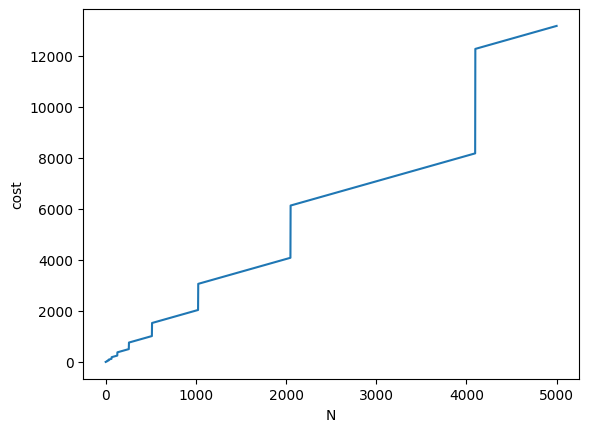

In [ ]:
import matplotlib.pyplot as plt

def plot_costs(times):
    plt.plot(times, label='append cost')
    plt.ylabel('cost')
    plt.xlabel('N')
    plt.show()

def append_cost(array_length, list_length):
    if array_length == list_length:
        return array_length
    return 1

def append_N_list_cost(N):
    array_length = 1 # initially the array will have length 1
    list_length = 0 # initially the list has 0 elements
    total_cost = 0 # this variable will keep track of the total cost
    for i in range(N):
        cost = append_cost(array_length, list_length)
        total_cost += cost
        # update the array and list lengths
        if array_length == list_length:
            array_length *= 2
        list_length += 1
    return total_cost

costs = []
for n in range(5000):
  custo = append_N_list_cost(n)
  costs.append(custo)

plot_costs(costs)

# List Complexities

If everything went well, you were able to run the experiment and estimate the cost of adding N elements to a list. You should have obtained something like this:


<center>
<img src="https://drive.google.com/uc?id=1zLftzR5Egex_I9GR6_8nZFjsbTmdsrX1" width="40%">
</center>

It's not clear at first how this function is growing. It grows linearly, but then it sometimes jumps. These jumps correspond to the moments where we needed to double the array length. The next figure shows the same plot together with the functions 2N and 3N:


<center>
<img src="https://drive.google.com/uc?id=17W26EfMZFMndMKjMVRzsHwJyDs9c9cXY" width="40%">
</center>

As we can see, the cost of appending an element to a list is always between 2N and 3N. Since it's always smaller than 3N and 3N = O(N), this means the cost of appending N elements to a list is O(N).

Since N operations cost O(N) , we can amortize the cost of a single operation by dividing the total cost by the number of operations. In this case, by dividing O(N) by N we get O(N) / N = O(1) for each **list.append()**. We then say that **list.append()** has **amortized complexity** of O(1).

In terms of execution time, having amortized complexity O(1) will yield the same results as if the complexity really was O(1). You can think of this analysis as distributing the few costly operations amongst all executions of the method.

How about other list methods? Here is a table with the time complexity of the most common list methods:

<center>
<img src="https://drive.google.com/uc?id=14V3M1h_UuYTXQsZrqm5ouiYI-CjaagQ8" width="40%">
</center>

Because of this, we should only use lists when the operations that we need to use on the data are limited to **list.append()**, **list.pop()**, and looping over all list elements. If we need more complex operations, odds are that there is a more efficient data structure for storing the data.

Looping over all list elements is not on the above table because it is not a list method. But it is efficient to do so since it takes O(N) to iterate over N elements in a list. No data structure can do this faster because, as we've learned. We cannot look at N values faster than O(N) since, inspecting a single memory location takes O(1).

Let's do an experiment to see the difference between adding at the end of the list with **list.append()** and at the beginning with **list.insert()**.


**Instructions**


Two functions are provided for you. The **add_with_append()** creates a list using the **list.append()** method, while **add_with_insert()** uses **list.insert()**. Your task is to time both functions to see that appending is much more efficient than inserting.

- Import the time module.
- Time the execution of **add_with_append(50000)**. To do so:
  - Compute the time before calling the function with the **time.time()** function. Assign the result to a variable named **start**.
  - Compute the time after calling the function with the **time.time()** function. Assign the result to a variable named **end**.
  - Compute the execution time by subtracting **start** from **end**. Assign the result to **time_append**.
- Perform the same steps to time **add_with_insert(50000)**. Assign the result to **time_insert**.
- Print both times and observe which one was faster.

In [ ]:
import time
def add_with_append(N):
    values = []
    for i in range(N):
        values.append(i)
    return values

def add_with_insert(N):
    values = []
    for i in range(N):
        values.insert(0, i)
    return values

start = time.time()
add_with_append(50000)
end = time.time()
time_append = (end - start)

start = time.time()
add_with_insert(50000)
end = time.time()
time_insert = end - start

print(time_append)
print(time_insert)

0.009394645690917969
0.6098215579986572


# Arithmetic Operations

As we saw in the previous exercise, inserting is much slower than appending. We obtained the values:

```python
0.007476806640625  # Time with list.append()
1.3033199310302734 # Time with _list.insert()
```

You might have gotten slightly different values, but in any case, the second value should be much larger than the first. Dividing 1.303 by 0.007 we get 186, meaning that **list.append()** was 186 times faster than **list.insert()** to add 50,000 values.

We mentioned that computers can do addition, subtraction, multiplication, and division in constant time.

Computer processors are designed to manipulate fixed bit length numbers very efficiently. However, we've already learned in the third Python course that Python does not use fixed bit length integers and that numeric values can grow as large as the computer memory allows.

We learned, in this lesson, that computers cannot manipulate arbitrarily large amounts of information in constant time. Since the size of numbers in Python can grow as large as the computer memory allows, we conclude that arithmetic operations cannot be performed in constant time in Python.

Arithmetic operations are yet another common example of hidden function calls in Python. The code **x + y** in Python is a syntactic sugar for **x.__add__(y)**. The same is true for other arithmetic operations. For example, **x * y** corresponds to **x.__mul__(y)**. The time complexity of doing an arithmetic operation between two integers depends on the number of digits required to represent them.

The exact time complexities are relatively complex and not very useful for data science as a whole. The reason is that we hardly ever deal with values that require more than 64 bits. Manipulating numbers with at most 64 bits can be done in constant time, even in Python. Only fields like cryptography care about the complexity of handling very large numbers since they use them constantly.

Let's perform an experiment to verify that as the number of digits increases, so does the time needed to compute the result of arithmetic operations.



1**Instructions**

The variable **pairs** contains a list of pairs of integers with an increasing number of digits. Each pair contains two integers with the same number of digits. In the first pair, the numbers will have 1 digit, in the second pair, they will have 2 digits and so on.

The idea of this experiment is to measure the time required to multiply each pair of integers and use the provided **plot_times()** function to plot these times to see that they are indeed increasing.

- Run the provided code to print the first few pairs. This is just so that you see the first 5 elements of **pairs**.
- Import the **time** module.
- Initialize and empty list named **times**.
- Use a **for** loop to iterate over all pairs contained in the **pairs** list. For each pair `x`, `y` do:
  - Use the **time.time()** to get the time before the multiplication.
  - Multiply `x` and `y` together.
  - Use the **time.time()** to get the time after the multiplication.
  - Add the elapsed time **end - start** to the **times** list.
- Use the provided **plot_times()** function to plot the **times** list.

In [ ]:
import random

def generate_list(k):
    items = []
    count = 1
    while len(items) < k:
        for _ in range(count):
            num1 = random.randint(10**(count-1), 10**count-1)
            num2 = random.randint(10**(count-1), 10**count-1)
            items.append((num1, num2))
            count += 1
            if len(items) == 5000:
                break
    return items

pairs = generate_list(5000)

[(5, 8), (22, 73), (407, 781), (8985, 6268), (95727, 70584)]


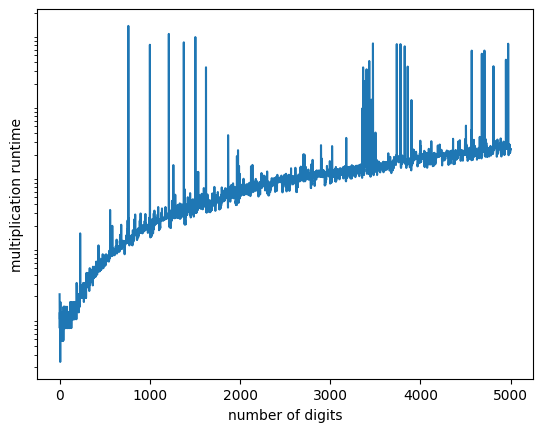

In [ ]:
import matplotlib.pyplot as plt
import time

def plot_times(times):
    plt.plot(times)
    plt.ylabel('multiplication runtime')
    plt.xlabel('number of digits')
    plt.yscale('log')
    plt.yticks([])
    plt.show()

print(pairs[:5])

times = []

for i in pairs:
  start = time.time()
  result = i[0] * i[1]
  end = time.time()
  time_final = end - start
  times.append(time_final)

plot_times(times)


# String Concatenation

In the previous exercise, we plotted the times of multiplying integers with an increasing number of digits. Here is what the plot looked like:

<center>
<img src="https://drive.google.com/uc?id=1K9ZgbR4YmEzt_dNjPw4RINkJRwVkrc0x" width="40%">
</center>

This shows that the execution time is not constant and increases as the number of digits increases. However, since most values that we deal with in data science are relatively small, we will always treat arithmetic operations between numeric values as constant-time operations.

Numbers are not the only objects over which we use arithmetic operations. We have seen that if `x` and `y` are integers, then **x + y** is actually a call to the method **int.__add__()**. A similar behavior occurs when concatenating strings. If `a` and `b` are strings then **a + b** will call the method **str._add__()** which, as we've learned, computes the result of concatenating `a` and `b`.

To refresh your memory, here is an example of string concatenation:

In [ ]:
a = 'univer'
b = 'sidade'
print(a + b)

But how much does it cost to concatenate two strings? We've learned that it cannot take constant time since we are producing an output that does not have a constant length.

Under the hood, strings, just like lists, are implemented using arrays. The array has one position for each character. Imagine we have two strings like below:



In [ ]:
x = 'univer'
y = 'sidade'

In memory, we will have two arrays containing the string characters:


<center>
<img src="https://drive.google.com/uc?id=1VtMI6JUE0Yo9QkLg2ZII5hFbdIBQXllz" width="40%">
</center>

Then, if we execute **x += y**, we will actually not modify the array containing x, but rather create a new one from scratch. The length of the array containing the concatenation will be equal to the sum of the lengths of x and y. Then the contents of both arrays will be copied to the new one. The variable x will then point to this new array:


<center>
<img src="https://drive.google.com/uc?id=1voYgbPEDR0DgM4Zb1iCvjJ-lS4OxTVYS" width="40%">
</center>

The total cost of this process is O(N + M), where N and M are the lengths of the two strings.

Imagine now that we want to concatenate a list of words. We can do it by iterating over the list and adding all strings to an initial empty string, like so:

In [ ]:
concat = ''
for word in ['String', 'Concatenation', 'With', 'Join']:
    concat += word
print(concat)

Let's say that we have a list of strings with lengths $w_1, w_2, \ldots, w_N$, where $N$ is the length of the list. We would like the cost of this to be proportional to the sums of the string lengths:

$
w_1 +  w_2 + \ldots + w_N
$

However, the cost is much higher. To see this, let's look at the first three words. Concatenating the first will cost $0 + w_1 = w_1$. The second will cost $w_1 + w_2$. The third one will cost $(w_1 + w_2) + w_3 = w_1 + w_2 + w_3$. Adding these together, we get a total cost of:

$
w_1 + (w_1 + w_2) + (w_1 + w_2 + w_3) = 3w_1 + 2w_2 + w_3
$

For each new word that we add, we need to copy again all the previously added words. This happens because the whole string is re-created from scratch each time. If we do this, N times it will cost:

$
Nw_1 + (N−1)w_2 + (N−2)w_3 + \ldots + w_N
$

This is much bigger than the sum of the lengths of all words. For this reason, it is not recommended to concatenate a lot of strings using the + operator. In order to get the desired complexity, we can use the [str.join()](https://docs.python.org/3/library/stdtypes.html#str.join) method like so:



In [ ]:
words = ['String', 'Concatenation', 'With', 'Join']
print(''.join(words))

This method also has the advantage of being much more concise.



**Instructions**


A list named **random_strings** that contains a list of randomly generated strings is available to you.

Two functions are also provided for you. The **concat_with_add()** function concatenates strings using the `+` operator while **concat_with_join()** uses **str.join()**. You task is to time both functions on the provided **word_list**.

- Run the provided code to print the words. This is to see the first 5 elements of **random_strings**.
- Import the **time** module.
- Measure the execution time of **concat_with_add()** over **random_strings**. To do so:
  - Compute the time before calling the function with the **time.time()** function. Assign the result to a variable named **start**.
  - Compute the time after calling the function with the **time.time()** function. Assign the result to a variable named **end**.
  - Compute the execution time by subtracting **start** from **end**. Assign the result to **time_add**.
- Perform the same steps to time **concat_with_join()**. Assign the result to **time_join**.
- Print both times and observe which one was faster.

Note that timing the execution of a function only once, may not provide a reliable measurement due to potential variability in the system's state. It's therefore advisable to perform multiple runs and compute the average of the measurements for more accuracy.

In [ ]:
import random
import string

def generate_list(k):
    result = []
    for _ in range(k):
        string_length = 10
        random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=string_length))
        result.append(random_string)
    return result

k = 100000  # Define the number of positions in the list
random_strings = generate_list(k)

In [ ]:
import time

def concat_with_add(word_list):
    concat = ''
    for word in word_list:
        concat += word
    return concat

def concat_with_join(word_list):
    return ''.join(word_list)

print(random_strings[:5])


start = time.time()
concat_with_add(random_strings)
end = time.time()
time_add = end - start
print(time_add)

start = time.time()
concat_with_join(random_strings)
end = time.time()
time_join = end - start
print(time_join)

['yVfEeLqP9O', 'DR6dKk4Acv', 'XiN9NLzcm1', 'bpDkxRXRcW', 'o5KMppRB0F']
0.016727447509765625
0.002126932144165039


# Hidden Python Optimizations

On the previous section, we learned that using the `+` operator to concatenate a lot of strings leads to very slow performance. However, when we measured the execution times, we did not get very different results:

```python
0.044194936752319336 # Time with +
0.003394603729248047 # Time with list.join()
```

The second one is faster indeed, but the difference should have been much bigger.

The reason is that using `+` to concatenate a large number of strings is such a common mistake that Python added mechanisms to try and make this run faster.

The way Python does it is very similar to the **list.append()** strategy used by lists to achieve constant time. Internally, Python will actually use a larger than necessary array to store the string characters. In this way, new characters can easily be added in constant time. This reduces the time complexity of concatenating two strings of sizes N and M from O(N + M) to O(M) because we only need to write the new M characters at the end.

However, unlike lists, string in Python are **immutable**. This means that the value of a string cannot be changed after it is assigned to a variable. Any change should create a brand new object in memory from scratch with the resulting value. Let's see what this means with an example.

Imagine that we have two variables `x` and `y` that refer to the same list. Then, if we add an element to `x` and then print both variables, we will see that both have changed:

In [ ]:
x = []
y = x
x.append(1)
print(x)
print(y)

However, if we do the same experiment with strings, only `x` will change values. Internally, when altering `x` Python will not actually alter it but rather create a brand new string whose value is the result of this alteration:

In [ ]:
x = 'a'
y = x
x += 'b'
print(x)
print(y)

So what does this all mean for our string concatenation example? It means that the above optimization that Python uses only works as long as no other variable references the string that we are working on. In some way, Python is cheating the immutable property by allowing to concatenate characters, thus modifying the string value.

By modifying the string, Python is not respecting the immutable properties of strings. When more than one variable reference the same string, Python needs to stop doing that because otherwise, the immutable property would be broken. We would be able to see the value changing by using that other reference.

To be on the safe side, we should stick to the **str.join()** function for concatenating a large number of strings. It can easily happen that we forget this and reference the string that is being built for one reason or another. Doing so will strongly degrade the execution making the code have quadratic complexity rather than linear complexity.

We can easily see this happen by slightly changing our example from the previous section.

**Instructions**


The commented experiment from the previous section is provided for you.

- Uncomment the provided code. You can do it by selecting the whole code and using the **`ctrl + /`** shortcut.
- In the **concat_with_add()** function, inside the for loop, after **concat += word** create a variable named **temp** and assign to it the value of **concat**.
- Run the experiment to see how the execution time is degraded.

In [ ]:
#import time

#def concat_with_add(word_list):
#    concat = ''
#    for word in word_list:
#        concat += word
#    return concat

#def concat_with_join(word_list):
#    return ''.join(word_list)

#start = time.time()
#concat_with_add(random_strings)
#end = time.time()
#time_add = end - start

#start = time.time()
#concat_with_join(random_strings)
#end = time.time()
#time_join = end - start

#print(time_add)
#print(time_join)

# Next steps

As you could see in the previous exercise, this simple change drastically increases the execution time of concatenating all strings using the `+` operator:

```python
5.073133945465088    # Time with +
0.002851247787475586 # Time with list.join()
```

If we divide 5.073 by 0.002 we get about 2536. This means that concatenating using the + operator was more than 2,500 times slower! The bottom line is you should use **list.join()** whenever you need to concatenate a large number of strings.

In this notebook, we've learned:

- What a constant-time algorithm is.
- The basic operations that a computer can do.
- A refined way of computing time complexity models that take into account functions.
- How to identify hidden function calls in Python and take them into account when analyzing the time complexity of an algorithm.
- The ins and outs of how lists and strings are stored in memory.

Let's recap the time complexities that we know so far in a diagram:


<center>
<img src="https://drive.google.com/uc?id=1Q2B2pmttz8YQ8EoL0mCD1VRzc7uNYXTC" width="40%">
</center>

In the next lesson, we will explore other kinds of complexities. We have learned about linear time complexity, quadratic complexity, and now constant time complexity. We will learn about logarithmic complexity and the binary search algorithm, which is an efficient algorithm to find elements in sorted lists.